Ця практична має на меті показати основні класи та методи бібліотеки sklearn для роботи з нейронними мережами.

In [1]:
from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score

import numpy as np
import pandas as pd

from matplotlib.colors import ListedColormap
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

In [2]:
def plot_data(X, y):
    ax = plt.gca()
    ax.scatter(X[:,0], X[:,1], c=(y == 1), cmap=cm_bright)
    

In [3]:
def plot_surface(est, x_1, x_2, ax=None, threshold=0.5, contourf=False):
    xx1, xx2 = np.meshgrid(np.linspace(x_1.min(), x_1.max(), 100), 
                           np.linspace(x_2.min(), x_2.max(), 100))

    X_pred = np.c_[xx1.ravel(), xx2.ravel()]
    pred = est.predict_proba(X_pred)[:, 1]
    Z = pred.reshape((100, 100))
    if ax is None:
        ax = plt.gca()
    ax.contour(xx1, xx2, Z, levels=[threshold], colors='black')
    ax.set_xlim((x_1.min(), x_1.max()))
    ax.set_ylim((x_2.min(), x_2.max()))
    

make_classification використовується для генерування тестових даних. За допомогою різних варіантів вхідних параметрі можна генерувати датасети, які можна буде лінійно розділити і такі, які не розділяються (складні області, шум).

In [4]:
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_classes=2)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

В реальних задачах обов"язково здійснюйте розділення даних на тренувальні та тестові!

In [6]:
X_train.shape

(160, 2)

In [7]:
X_test.shape

(40, 2)

In [9]:
cls = MLPClassifier(activation='tanh', hidden_layer_sizes=(100, 50,))

Спробуйте різні параметри для make_classification та MLPClassifier. Зокрема, генеруйте датасети з більшими кількостями характеристик і складнішим виглядом. Зауважте, що тоді побудова графіків буде складнішою (поточні методи для цього не працюватимуть).

In [10]:
cls = cls.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [11]:
y_train_pred = cls.predict(X_train)

In [12]:
accuracy_score(y_train_pred, y_train)

0.9625

In [13]:
y_test_pred = cls.predict(X_test)
accuracy_score(y_test_pred, y_test)

0.95

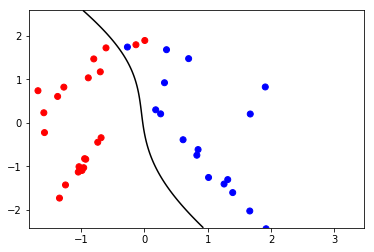

In [15]:
plot_data(X_test, y_test)
plot_surface(cls, X_train[:,0], X_train[:,1])
plt.show()

Скільки шарів та нейронів в них має дана мережа? Яка швидкість навчання? Які функції активації використовуються та скільки ітерацій?

In [14]:
cls

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

Спробуємо на відомому нам датасеті:

In [16]:
dataset = pd.read_csv('sats.csv')

In [17]:
X, y = dataset[['exam1', 'exam2']], dataset['submitted']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape)

(80, 2) (20, 2)


In [19]:
cls = MLPClassifier(activation='logistic', max_iter=1000)

In [20]:
cls = cls.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [21]:
y_train_pred = cls.predict(X_train)
accuracy_score(y_train_pred, y_train)

0.9875

In [22]:
y_test_pred = cls.predict(X_test)
accuracy_score(y_test_pred, y_test)

0.95

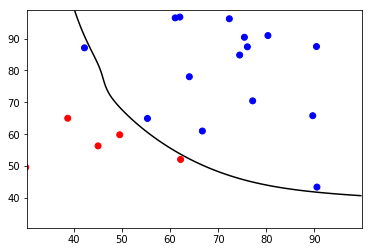

In [23]:
plot_data(X_test.values, y_test)
plot_surface(cls, X_train.values[:,0], X_train.values[:,1])
plt.show()

А тепер на складнішому - він не так просто розділяється границею прийняття рішення. Ми це бачили в логістичній регресії.

In [24]:
dataset = pd.read_csv('tests.csv')
X, y = dataset[['test1', 'test2']], dataset['passed']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape)

(94, 2) (24, 2)


In [26]:
cls = MLPClassifier(activation='relu', max_iter=10000)

In [27]:
cls = cls.fit(X_train, y_train)

In [28]:
y_train_pred = cls.predict(X_train)
accuracy_score(y_train_pred, y_train)

0.8617021276595744

In [29]:
y_test_pred = cls.predict(X_test)
accuracy_score(y_test_pred, y_test)

0.7916666666666666

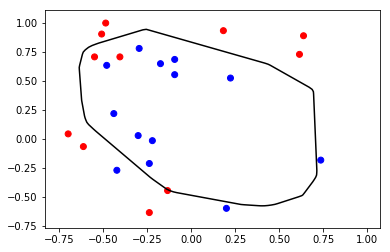

In [30]:
plot_data(X_test.values, y_test)
plot_surface(cls, X_train.values[:,0], X_train.values[:,1])
plt.show()